In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('mumbai.csv')
df.columns = df.columns.str.strip()

# Print the list of column names
columns_list = df.columns.tolist()
print(columns_list)
print(type(df))
df.columns = df.columns.str.strip()
# print(type(df))

# print(df.columns)
df=df[[ 'name','datetime',  'temp', 'dew', 'humidity', 'precip','preciptype','solarenergy','moonphase','cloudcover']]

print(df.head())
#

['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']
<class 'pandas.core.frame.DataFrame'>
     name    datetime  temp   dew  humidity  precip preciptype  solarenergy  \
0  mumbai  2021-07-01  30.0  25.5      77.1     0.0        NaN         21.3   
1  mumbai  2021-07-02  30.0  25.3      76.0     0.2       rain         21.4   
2  mumbai  2021-07-03  30.3  25.6      75.9     2.0       rain         22.1   
3  mumbai  2021-07-04  30.4  25.5      75.7     0.0        NaN         20.7   
4  mumbai  2021-07-05  30.6  25.6      75.2     0.0        NaN         21.2   

   moonphase  cloudcover  
0       0.71        52.9  
1       0.75       

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def calculate_10day_average(dfin, close_column):
    print(close_column)
    dfin['5day_avg'+close_column] = dfin[close_column].rolling(window=5, min_periods=1).mean()
    # dfin['20day_avg'] = dfin[close_column].rolling(window=20, min_periods=1).mean()

    # Calculate standard deviation for 5-day and 20-day averages
    dfin['5day_std'+close_column] = dfin[close_column].rolling(window=5, min_periods=1).std()
    # dfin['20day_std'] = dfin[close_column].rolling(window=20, min_periods=1).std()

    return dfin

# df = calculate_10day_average(df)
df2 = calculate_10day_average(df,'temp')
df3 = calculate_10day_average(df,'dew')
df4 = calculate_10day_average(df,'humidity')


column_to_shift = 'temp'
df4['targethum'] = df4['humidity'].shift(-1)
df2['targettemp'] = df2['temp'].shift(-1)
df3['targetdew'] = df3['dew'].shift(-1)

columns_list2 = df.columns.tolist()
print(columns_list2)
# print(df[:10:1])
# print(df[-10::1])

print(df2[-10::1])
# Assuming df is your DataFrame with 6 features and 1 target
# X contains features, y contains target variable
# df['target']=df['preciptype']
# df2=df[['temp','dew','humidity','target']]
# df['target'] = np.where(df['target'].isnull(), 0, 1)
# from sklearn.preprocessing import LabelEncoder

# df['target'].fillna('NaN', inplace=True)

# # Create a LabelEncoder
# label_encoder = LabelEncoder()

# # Fit label encoder and transform the target variable
# df['target2'] = label_encoder.fit_transform(df['target'].astype(str))
# # Count the occurrences of each class in the target variable
# class_counts = df['target2'].value_counts()

# # Print the counts for each class
# print("Class Counts:")
# print(class_counts)

# X = df2.drop('target', axis=1)
# y = df['target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors here

# # Train the model
# knn.fit(X_train_scaled, y_train)

# # Make predictions on the test set
# y_pred = knn.predict(X_test_scaled)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("KNN Accuracy:", accuracy)


temp
dew
humidity
['name', 'datetime', 'temp', 'dew', 'humidity', 'precip', 'preciptype', 'solarenergy', 'moonphase', 'cloudcover', '5day_avgtemp', '5day_stdtemp', '5day_avgdew', '5day_stddew', '5day_avghumidity', '5day_stdhumidity', 'targethum', 'targettemp', 'targetdew']
       name    datetime  temp   dew  humidity  precip preciptype  solarenergy  \
979  mumbai  2024-03-06  26.6  11.0      40.2     0.0        NaN         24.1   
980  mumbai  2024-03-07  27.5  14.0      44.8     0.0        NaN         23.6   
981  mumbai  2024-03-08  28.9  10.2      32.3     0.0        NaN         23.8   
982  mumbai  2024-03-09  28.6  12.1      36.8     0.0        NaN         23.8   
983  mumbai  2024-03-10  28.0  13.8      43.0     0.0        NaN         24.4   
984  mumbai  2024-03-11  28.2  13.4      41.5     0.0        NaN         24.0   
985  mumbai  2024-03-12  29.7  14.9      41.8     0.0        NaN         24.0   
986  mumbai  2024-03-13  27.9  19.1      61.1     0.0        NaN         24.1 

predictions


In [145]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

custom_feature1 = df2['temp'].values.reshape(-1, 1)
custom_feature2 = df2['5day_avgtemp'].values.reshape(-1, 1)
custom_feature3 = df2['5day_stdtemp'].values.reshape(-1, 1)
target = df2['targettemp'].values

# print(df2.columns)
# imputer = SimpleImputer(strategy='mean')
# df_filled = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)


temp prediction

In [146]:
df2.dropna(inplace=True)
# print(df2.head())
# Combine the custom features into one array
X = df2[['temp', 'dew', 'humidity','precip','cloudcover','moonphase']].values
# X = df4[['temp','5day_avghumidity','5day_stdhumidity','5day_avgtemp','5day_stdtemp','5day_avgdew','5day_stddew', 'dew', 'humidity','precip','cloudcover','moonphase']].values

# Extract the target variable
y = df2['targettemp'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error temp:', mse)


knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_model.predict(X_test)

# Calculate mean squared error
knn_mse = mean_squared_error(y_test, knn_predictions)
print('KNN Regression Mean Squared Error:', knn_mse)
svm_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  # You can adjust C and epsilon as needed

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test)

# Calculate mean squared error
svm_mse = mean_squared_error(y_test, svm_predictions)
print('SVM Regression Mean Squared Error:', svm_mse)



# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test)

# Calculate mean squared error
rf_mse = mean_squared_error(y_test, rf_predictions)
print('Random Forest Regression Mean Squared Error:', rf_mse)


Mean Squared Error temp: 0.9089384344206718
KNN Regression Mean Squared Error: 2.614005128205129
SVM Regression Mean Squared Error: 1.4621773787545183
Random Forest Regression Mean Squared Error: 1.0400018205128216


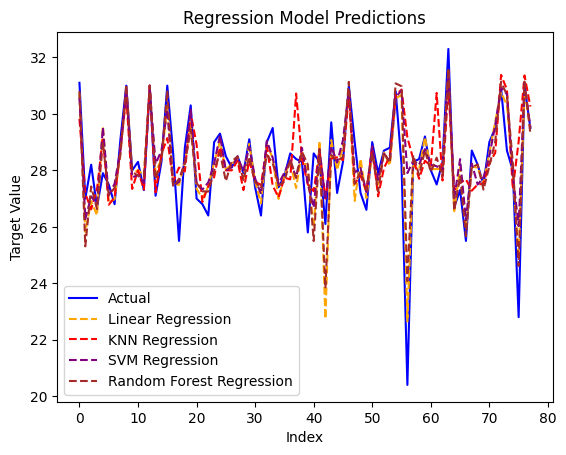

In [147]:


# Plot actual values
plt.plot(y_test, label='Actual', color='blue')

# Plot historical values (if available)
# historical_values = ... # Load historical values from somewhere
# plt.plot(historical_values, label='Historical', color='green')

# Plot predictions from Linear Regression
plt.plot(predictions, label='Linear Regression', linestyle='--', color='orange')

# Plot predictions from KNN Regression
plt.plot(knn_predictions, label='KNN Regression', linestyle='--', color='red')

# Plot predictions from SVM Regression
plt.plot(svm_predictions, label='SVM Regression', linestyle='--', color='purple')

# Plot predictions from Random Forest Regression
plt.plot(rf_predictions, label='Random Forest Regression', linestyle='--', color='brown')

plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Regression Model Predictions')
plt.legend()
plt.show()



dew


In [154]:
df3.dropna(inplace=True)
# print(df3.head())
# Combine the custom features into one array
X = df3[['dew', 'temp', 'humidity','precip']].values
# X = df3[['temp','5day_avgtemp','5day_stdtemp', 'dew', 'humidity','precip','cloudcover','moonphase']].values
# X = df3[['temp','5day_avghumidity','5day_stdhumidity','5day_avgtemp','5day_stdtemp','5day_avgdew','5day_stddew', 'dew', 'humidity','precip','cloudcover','moonphase']].values

# Extract the target variable
y = df2['targetdew'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error dew:', mse)

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_model.predict(X_test)

# Calculate mean squared error
knn_mse = mean_squared_error(y_test, knn_predictions)
print('KNN Regression Mean Squared Error:', knn_mse)
svm_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  # You can adjust C and epsilon as needed

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test)

# Calculate mean squared error
svm_mse = mean_squared_error(y_test, svm_predictions)
print('SVM Regression Mean Squared Error:', svm_mse)


# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test)

# Calculate mean squared error
rf_mse = mean_squared_error(y_test, rf_predictions)
print('Random Forest Regression Mean Squared Error:', rf_mse)


Mean Squared Error dew: 1.2576344523728957
KNN Regression Mean Squared Error: 3.9905435897435915
SVM Regression Mean Squared Error: 4.815766840383598
Random Forest Regression Mean Squared Error: 2.2934316923076947


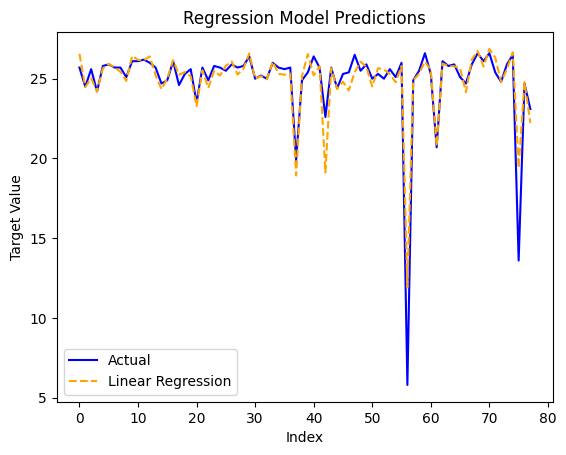

In [155]:


# Plot actual values
plt.plot(y_test, label='Actual', color='blue')

# Plot historical values (if available)
# historical_values = ... # Load historical values from somewhere
# plt.plot(historical_values, label='Historical', color='green')

# Plot predictions from Linear Regression
plt.plot(predictions, label='Linear Regression', linestyle='--', color='orange')

# Plot predictions from KNN Regression
# plt.plot(knn_predictions, label='KNN Regression', linestyle='--', color='red')

# Plot predictions from SVM Regression
# plt.plot(svm_predictions, label='SVM Regression', linestyle='--', color='purple')

# Plot predictions from Random Forest Regression
# plt.plot(rf_predictions, label='Random Forest Regression', linestyle='--', color='brown')

plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Regression Model Predictions')
plt.legend()
plt.show()



humidity

In [158]:
df4.dropna(inplace=True)
# print(df.head())
# Combine the custom features into one array
X = df4[['humidity', 'temp', 'dew','precip','moonphase']].values
# X = df4[['temp','5day_avghumidity','5day_stdhumidity','5day_avgtemp','5day_stdtemp','5day_avgdew','5day_stddew', 'dew', 'humidity','precip','cloudcover','moonphase']].values

# Extract the target variable
y = df4['targethum'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error humidity:', mse)

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_model.predict(X_test)

# Calculate mean squared error
knn_mse = mean_squared_error(y_test, knn_predictions)
print('KNN Regression Mean Squared Error:', knn_mse)
svm_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  # You can adjust C and epsilon as needed

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test)

# Calculate mean squared error
svm_mse = mean_squared_error(y_test, svm_predictions)
print('SVM Regression Mean Squared Error:', svm_mse)


# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test)

# Calculate mean squared error
rf_mse = mean_squared_error(y_test, rf_predictions)
print('Random Forest Regression Mean Squared Error:', rf_mse)

Mean Squared Error humidity: 17.738610941379996
KNN Regression Mean Squared Error: 25.06813333333333
SVM Regression Mean Squared Error: 48.52584301822169
Random Forest Regression Mean Squared Error: 20.700724423076963


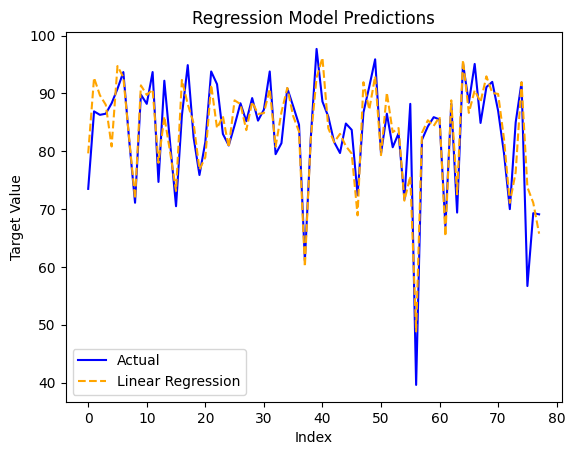

In [159]:


# Plot actual values
plt.plot(y_test, label='Actual', color='blue')

# Plot historical values (if available)
# historical_values = ... # Load historical values from somewhere
# plt.plot(historical_values, label='Historical', color='green')

# Plot predictions from Linear Regression
plt.plot(predictions, label='Linear Regression', linestyle='--', color='orange')

# Plot predictions from KNN Regression
# plt.plot(knn_predictions, label='KNN Regression', linestyle='--', color='red')

# Plot predictions from SVM Regression
# plt.plot(svm_predictions, label='SVM Regression', linestyle='--', color='purple')

# Plot predictions from Random Forest Regression
# plt.plot(rf_predictions, label='Random Forest Regression', linestyle='--', color='brown')

plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Regression Model Predictions')
plt.legend()
plt.show()

